BehaviorSpace results (NetLogo 6.4.0)	Table version 2.0																										
social-media-polarisation.nlogo																											
Experiment 1.0																											
11/20/2024 18:06:08:141 +0000																											
min-pxcor	max-pxcor	min-pycor	max-pycor																								
-50	50	-50	50																								

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [72]:
str = '1.1'

In [73]:
data = pd.read_csv(f'experiments/experiment {str}.csv' , skiprows=6)
# data = data.sort_values('[step]')
data.head(5)

,[run number],avg-num-groups-per-agent,sd-num-groups-per-agent,group-strength-increase,gamma0,gamma1,num-agents,base-death-rate,bubble-size,max-ticks,...,opinion-extremity-increase,alpha2,max-age,multiple-group-membership?,offline-interaction-interval,birth-rate,interaction-radius,age-death-factor,[step],[opinion] of turtles
0,3,2,1,0.05,1.5,-0.5,350,0.0002,50,100000,...,0.01,0.3,100,True,50,0.121752,1,0.02,0,[0.007660116866929134 0.6360554218882718 0.965...
1,2,2,1,0.05,1.5,-0.5,350,0.0002,50,100000,...,0.01,0.3,100,True,50,0.121752,1,0.02,0,[0.36103113282361377 0.11201479276114656 0.904...
2,5,2,1,0.05,1.5,-0.5,350,0.0002,50,100000,...,0.01,0.3,100,True,50,0.121752,1,0.02,0,[0.7213188902340002 0.8868452288487979 0.74488...
3,1,2,1,0.05,1.5,-0.5,350,0.0002,50,100000,...,0.01,0.3,100,True,50,0.121752,1,0.02,0,[0.4764880229058418 0.3801485952145972 0.01717...
4,4,2,1,0.05,1.5,-0.5,350,0.0002,50,100000,...,0.01,0.3,100,True,50,0.121752,1,0.02,0,[0.9176928706903699 0.37685016867329 0.3937216...


In [74]:
df = pd.DataFrame(data[['[opinion] of turtles', '[run number]']])
df.rename(columns={'[opinion] of turtles': 'opinions', '[run number]': 'run'}, inplace=True)
df['opinions'] = df['opinions'].apply(lambda x: re.findall(r"[-+]?\d*\.\d+|\d+", x))
df['opinions'] = df['opinions'].apply(lambda x: [float(i) for i in x])
df['run_index'] = df.groupby('run').cumcount()
# df = df.iloc[::100, :]
df.head(5)

,opinions,run,run_index
0,"[0.007660116866929134, 0.6360554218882718, 0.9...",3,0
1,"[0.36103113282361377, 0.11201479276114656, 0.9...",2,0
2,"[0.7213188902340002, 0.8868452288487979, 0.744...",5,0
3,"[0.4764880229058418, 0.3801485952145972, 0.017...",1,0
4,"[0.9176928706903699, 0.37685016867329, 0.39372...",4,0


In [75]:
df_exploded = df.explode('opinions')
df_exploded.head(5)

,opinions,run,run_index
0,0.00766,3,0
0,0.636055,3,0
0,0.965386,3,0
0,0.527629,3,0
0,0.301588,3,0


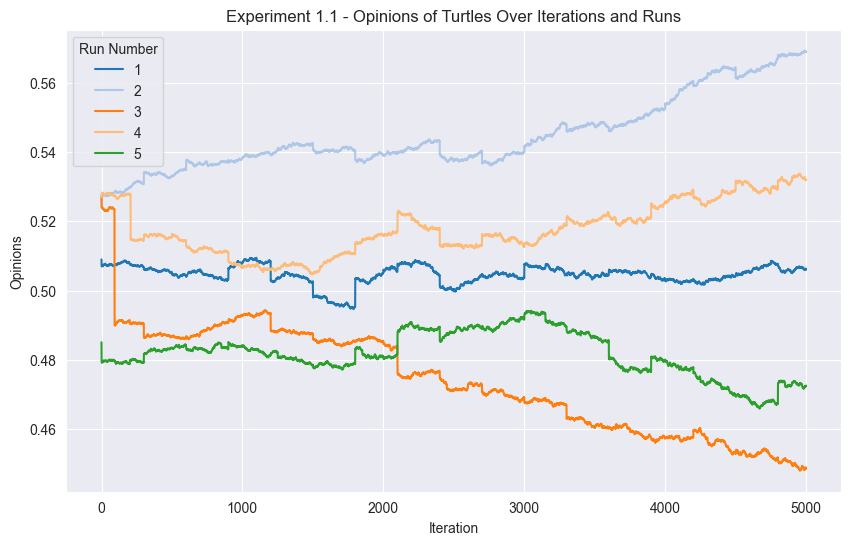

In [76]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_exploded, x='run_index', y='opinions', hue='run', palette='tab20', errorbar=None)
plt.title(f'Experiment {str} - Opinions of Turtles Over Iterations and Runs')
plt.xlabel('Iteration')
plt.ylabel('Opinions')
plt.legend(title='Run Number')
plt.savefig(f'plots/lines/experiment-{str}-runs.png', dpi=300)
plt.show()